In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.utils import save_image

In [2]:
device= torch.device("cuda"if torch.cuda.is_available else "cpu")
image_size = 365

epoches= 1000
learning_rate= 0.001
alpha= 1
beta=0.01
device

device(type='cuda')

the location of image should be like "E:\projects\style_transfer\mona_lisa.PNG"

In [3]:
class VGG(nn.Module):
  def __init__(self) :
    super(VGG,self).__init__()
    #we are chossing the first conv layer after the max pooling
    self.chosen_features = ['0','5','10','19','28']
    #we are slelcting only upto 28 layers(29-1) for our model
    self.model= models.vgg19(pretrained=True).features[:29]

  def forward(self,x):
    #getting chosen feature layers from model
    features=[]
    for layer_num,layer in enumerate(self.model):
      x=layer(x)
      if str(layer_num) in self.chosen_features:
        features.append(x)
    return features


In [4]:
#we are loading unsquzeeing the image and moving it to device ie. GPU or CPU
def load_image(image_name):
  image=Image.open(image_name)
  image=loader(image).unsqueeze(0)
  return image.to (device)

In [5]:
loader=transforms.Compose(
    [
        transforms.Resize((image_size,image_size)),
        transforms.ToTensor()
    ]
)

In [6]:
style_location=input("enter the path of the style image :")
content_location=input("enter the path of the image you want to change the style :")

enter the path of the style image :C:\Users\ADMIN\style transfer\stary_nights.jpg
enter the path of the image you want to change the style :C:\Users\ADMIN\style transfer\mona_lisa.PNG


In [7]:
original_image=load_image(content_location)
style_image=load_image(style_location)

In [8]:
model=VGG().to(device).eval()
generated=original_image.clone().requires_grad_(True)
generated.shape

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([1, 3, 365, 365])

In [9]:
#setting optimizer
optimizer=optim.Adam([generated],lr=learning_rate)

In [10]:
#training loop
for steps in range(epoches):
  generated_features=model(generated)
  original_features=model(original_image)
  style_features=model(style_image)

  style_loss = original_loss = 0

  for gen_features,orgin_features,sty_features in zip(generated_features,original_features,style_features):
    batch_size,channel,height,width=gen_features.shape
    original_loss += torch.mean((gen_features-orgin_features)**2)

    #compute gram matrix
    G = gen_features.view(channel,height*width).mm(gen_features.view(channel,height*width).t())
    
    A = sty_features.view(channel,height*width).mm(sty_features.view(channel,height*width).t())

    style_loss += torch.mean((G-A)**2)


  total_loss = alpha * original_loss + beta * style_loss
  optimizer.zero_grad()
  total_loss.backward()
  optimizer.step()

  if steps % 100 == 0:
    print(steps,total_loss)
    save_image(generated,"genarated.png")

0 tensor(784119.1250, device='cuda:0', grad_fn=<AddBackward0>)
100 tensor(55786.4727, device='cuda:0', grad_fn=<AddBackward0>)
200 tensor(33025.0859, device='cuda:0', grad_fn=<AddBackward0>)
300 tensor(23837.8203, device='cuda:0', grad_fn=<AddBackward0>)
400 tensor(17547.2734, device='cuda:0', grad_fn=<AddBackward0>)
500 tensor(12645.8838, device='cuda:0', grad_fn=<AddBackward0>)
600 tensor(8832.0518, device='cuda:0', grad_fn=<AddBackward0>)
700 tensor(6099.1509, device='cuda:0', grad_fn=<AddBackward0>)
800 tensor(4349.2881, device='cuda:0', grad_fn=<AddBackward0>)
900 tensor(3337.8262, device='cuda:0', grad_fn=<AddBackward0>)


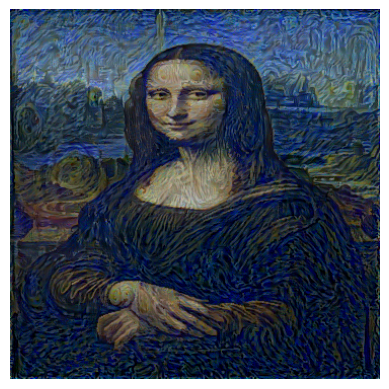

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image file
image_path = "genarated.png"

# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()
